# Preamble

## Note from the instructor

Denis jacob Machado has modified this notebook for educational purposes. Mainly, Denis added **10 questions** and placeholders for their answers. But there is also some new textto help contextualizing this notebook with the the goals of the course (Machine Learning fo Bioinformatics). Also, there may be slight changes in the code, including new commentary. That is just to help with readability.

Students are advised to change the settings of this Colab to make the code more readable. Go to Tools > Settings > Editor, and check the boxes that read:

- "Show line numbers,"
- "Show indentation guides," and
- "Enable code folding in the editor."

## Source

- Available: https://www.tensorflow.org/guide/keras/rnn
- Last accessed: October 19, 2022
- Copyright: 2020 / The TensorFlow Authors

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Recurrent Neural Networks (RNN) with Keras

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/keras/rnn"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/snapshot-keras/site/en/guide/keras/rnn.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/keras-team/keras-io/blob/master/guides/working_with_rnns.py"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/keras/rnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction

Recurrent neural networks (RNN) are a class of neural networks that is powerful for
modeling sequence data such as time series or natural language.

Schematically, a RNN layer uses a `for` loop to iterate over the timesteps of a
sequence, while maintaining an internal state that encodes information about the
timesteps it has seen so far.

The Keras RNN API is designed with a focus on:

- **Ease of use**: the built-in `keras.layers.RNN`, `keras.layers.LSTM`,
`keras.layers.GRU` layers enable you to quickly build recurrent models without
having to make difficult configuration choices.

- **Ease of customization**: You can also define your own RNN cell layer (the inner
part of the `for` loop) with custom behavior, and use it with the generic
`keras.layers.RNN` layer (the `for` loop itself). This allows you to quickly
prototype different research ideas in a flexible way with minimal code.

## Setup

In [1]:
# First we must get the libraries and modules that we will neeed:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

❓❓❓

## Question 1

Provide a bullet point list explaining, in two sentences or less, what are:
- Numpy
- TensorFlow
- Keras

## Answer 1

**Please enter your answer here**

❓❓❓

## Built-in RNN layers: a simple example

There are three built-in RNN layers in Keras:

1. `keras.layers.SimpleRNN`, a fully-connected RNN where the output from previous
timestep is to be fed to next timestep.

2. `keras.layers.GRU`, first proposed in
[Cho et al., 2014](https://arxiv.org/abs/1406.1078).

3. `keras.layers.LSTM`, first proposed in
[Hochreiter & Schmidhuber, 1997](https://www.bioinf.jku.at/publications/older/2604.pdf).

In early 2015, Keras had the first reusable open-source Python implementations of LSTM
and GRU.

Here is a simple example of a `Sequential` model that processes sequences of integers,
embeds each integer into a 64-dimensional vector, then processes the sequence of
vectors using a `LSTM` layer.

In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units (neurons).
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units (neurons).
model.add(layers.Dense(10))

##
# NOTE
##

# A Dense layer is deeply connected layer from its preceding layer which works
# for changing the dimension of the output by performing matrix vector
# multiplication.


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


## Necessary digressions

### None

The the Ouput Shape column of the summary above, "None" means this dimension is variable.

In Keras, the first dimension in a model is the batch size. However, the user frequently does not need fixed batch sizes unless in very specific cases (e.g., using LSTM layers with stateful=True). Therefore, this dimension is often ignored when you define your model.

For instance, when you define input_shape=(100,200), you're ignoring the batch size and defining the shape of "each sample." Internally the shape will be (None, 100, 200), allowing a variable batch size, each sample in the batch having the shape (100,200).

The batch size will be then automatically defined in the fit or predict methods.

### The input shape in a Keras layer

In a Keras layer, the input shape is generally the shape of the input data provided to the Keras model while training. The model cannot know the shape of the training data. The shape of other tensors(layers) is computed automatically. 

Each type of Keras layer requires the input with a certain number of dimensions:

- Dense layers require inputs as (batch_size, input_size)
- 2D convolutional layers need inputs as:
  - if using channels_last: (batch_size, imageside1, imageside2, channels)
  - if using channels_first: (batch_size, channels, imageside1, imageside2)
- 1D convolutions and recurrent layers use(batch_size, sequence_length, features)

The shape of other tensors is computed based on the number of units provided along with other particularities like kernel_size in the Conv2D layer.

❓❓❓

## Question 2

a) See theoriginal publications listed above to provide short definitions of Long short-term memory (LSTM) and Gated Recurrent Unit (GRU) layers. WARNING: You are expected to find the original publications even if the links above do not work.

b) What special type of problem are LSTM or GRU layers trying to solve? TIP: It has to do with gradients.

c) What is the function used to add layers?

## Answer 2

**Please enter your answer here**

❓❓❓

Built-in RNNs support a number of useful features:

- Recurrent dropout, via the `dropout` and `recurrent_dropout` arguments
- Ability to process an input sequence in reverse, via the `go_backwards` argument
- Loop unrolling (which can lead to a large speedup when processing short sequences on
CPU), via the `unroll` argument
- ...and more.

For more information, see the
[RNN API documentation](https://keras.io/api/layers/recurrent_layers/).

## Outputs and states

By default, the output of a RNN layer contains a single vector per sample. This vector
is the RNN cell output corresponding to the last timestep, containing information
about the entire input sequence. The shape of this output is `(batch_size, units)`
where `units` corresponds to the `units` argument passed to the layer's constructor.

A RNN layer can also return the entire sequence of outputs for each sample (one vector
per timestep per sample), if you set `return_sequences=True`. The shape of this output
is `(batch_size, timesteps, units)`.

In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

##
# NOTE
##

# A simple RNN is a fully-connected RNN where the output is to be fed back to
# input.

model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 256)         247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


❓❓❓

## Question 3

a) A **tensor** is a generalization of vectors and matrices and is easily understood as a multidimensional array. A **Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Knowing that, what is the function **keras.Sequential()** doing?

b) Based on the summary of the model above, describe the topology of the RNN created in the last code section using values in the "Output Shape" column.

## Answer 3

**Please enter your answer here**

❓❓❓

In addition, a RNN layer can return its final internal state(s). The returned states
can be used to resume the RNN execution later, or
[to initialize another RNN](https://arxiv.org/abs/1409.3215).
This setting is commonly used in the
encoder-decoder sequence-to-sequence model, where the encoder final state is used as
the initial state of the decoder.

To configure a RNN layer to return its internal state, set the `return_state` parameter
to `True` when creating the layer. Note that `LSTM` has 2 state  tensors, but `GRU`
only has one.

To configure the initial state of the layer, just call the layer with additional
keyword argument `initial_state`.
Note that the shape of the state needs to match the unit size of the layer, like in the
example below.

In [ ]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 64)     64000       ['input_1[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, None, 64)     128000      ['input_2[0][0]']                
                                                                                              

## RNN layers and RNN cells

In addition to the built-in RNN layers, the RNN API also provides cell-level APIs.
Unlike RNN layers, which processes whole batches of input sequences, the RNN cell only
processes a single timestep.

The cell is the inside of the `for` loop of a RNN layer. Wrapping a cell inside a
`keras.layers.RNN` layer gives you a layer capable of processing batches of
sequences, e.g. `RNN(LSTMCell(10))`.

Mathematically, `RNN(LSTMCell(10))` produces the same result as `LSTM(10)`. In fact,
the implementation of this layer in TF v1.x was just creating the corresponding RNN
cell and wrapping it in a RNN layer.  However using the built-in `GRU` and `LSTM`
layers enable the use of CuDNN and you may see better performance.

There are three built-in RNN cells, each of them corresponding to the matching RNN
layer.

- `keras.layers.SimpleRNNCell` corresponds to the `SimpleRNN` layer.

- `keras.layers.GRUCell` corresponds to the `GRU` layer.

- `keras.layers.LSTMCell` corresponds to the `LSTM` layer.

The cell abstraction, together with the generic `keras.layers.RNN` class, make it
very easy to implement custom RNN architectures for your research.

## Cross-batch statefulness

When processing very long sequences (possibly infinite), you may want to use the
pattern of **cross-batch statefulness**.

Normally, the internal state of a RNN layer is reset every time it sees a new batch
(i.e. every sample seen by the layer is assumed to be independent of the past). The
layer will only maintain a state while processing a given sample.

If you have very long sequences though, it is useful to break them into shorter
sequences, and to feed these shorter sequences sequentially into a RNN layer without
resetting the layer's state. That way, the layer can retain information about the
entirety of the sequence, even though it's only seeing one sub-sequence at a time.

You can do this by setting `stateful=True` in the constructor.

If you have a sequence `s = [t0, t1, ... t1546, t1547]`, you would split it into e.g.

```
s1 = [t0, t1, ... t100]
s2 = [t101, ... t201]
...
s16 = [t1501, ... t1547]
```

Then you would process it via:

```python
lstm_layer = layers.LSTM(64, stateful=True)
for s in sub_sequences:
  output = lstm_layer(s)
```

When you want to clear the state, you  can use `layer.reset_states()`.


> Note: In this setup, sample `i` in a given batch is assumed to be the continuation of
sample `i` in the previous batch. This means that all batches should contain the same
number of samples (batch size). E.g. if a batch contains `[sequence_A_from_t0_to_t100,
 sequence_B_from_t0_to_t100]`, the next batch should contain
`[sequence_A_from_t101_to_t200,  sequence_B_from_t101_to_t200]`.




Here is a complete example:

In [ ]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

print("This is how paragraph 1 looks like:\n{}".format(paragraph1))

lstm_layer = layers.LSTM(64, stateful=True)
output     = lstm_layer(paragraph1)
output     = lstm_layer(paragraph2)
output     = lstm_layer(paragraph3)

print("This is how the output looks like after line 10:\n{}".format(output))

lstm_layer.reset_states()

##
# NOTE
##

# The reset_states() functionwill reset the cached state to the original
# initial_state. If no initial_state was provided, zero-states will be used by
# default.

This is how paragraph 1 looks like:
[[[0.4347086  0.53176636 0.82410216 ... 0.85534483 0.4943239  0.92487514]
  [0.6767962  0.6078676  0.99413913 ... 0.87702703 0.35565245 0.07722962]
  [0.86676395 0.16358913 0.57200813 ... 0.972635   0.68833166 0.5971157 ]
  ...
  [0.5405155  0.20918876 0.8653454  ... 0.01808635 0.931589   0.08194371]
  [0.03053755 0.97045237 0.53547484 ... 0.20237648 0.8408314  0.6064737 ]
  [0.21577445 0.4517549  0.03277316 ... 0.27329448 0.7125015  0.865274  ]]

 [[0.39959687 0.12832682 0.04793756 ... 0.7001522  0.90106934 0.94644177]
  [0.44671983 0.03347481 0.22894293 ... 0.05354965 0.4494714  0.31467023]
  [0.14066322 0.56585693 0.24096733 ... 0.42656994 0.2162629  0.7875794 ]
  ...
  [0.86018634 0.29119185 0.7157929  ... 0.19673242 0.74073774 0.3984393 ]
  [0.23703556 0.77149457 0.09322181 ... 0.6140588  0.3002493  0.7391381 ]
  [0.36529312 0.8064618  0.9783414  ... 0.8422777  0.9599302  0.5546395 ]]

 [[0.60169935 0.5137001  0.33466724 ... 0.23693565 0.0677223

❓❓❓

## Question 4

Why would you want to use the pattern of **cross-batch statefulness** when processing very long sequences?

## Answer 4

**Please enter your answer here**

❓❓❓

### RNN State Reuse
<a id="rnn_state_reuse"></a>

The recorded states of the RNN layer are not included in the `layer.weights()`. If you
would like to reuse the state from a RNN layer, you can retrieve the states value by
`layer.states` and use it as the
initial state for a new layer via the Keras functional API like `new_layer(inputs,
initial_state=layer.states)`, or model subclassing.

Please also note that sequential model might not be used in this case since it only
supports layers with single input and output, the extra input of initial state makes
it impossible to use here.

In [ ]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

existing_state = lstm_layer.states

new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)


❓❓❓

## Question 5
What is the main difference between the code section above and the one that came before it?

## Answer 5

**Please enter your answer here**

❓❓❓

## Bidirectional RNNs

For sequences other than time series (e.g. text), it is often the case that a RNN model
can perform better if it not only processes sequence from start to end, but also
backwards. For example, to predict the next word in a sentence, it is often useful to
have the context around the word, not only just the words that come before it.

Keras provides an easy API for you to build such bidirectional RNNs: the
`keras.layers.Bidirectional` wrapper.

In [ ]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 128)           38400     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


❓❓❓

## Question 6

The tf.keras.layers.Bidirectional is a bidirectional wrapper for RNNs. While a typical state in an RNN (simple RNN, GRU, or LSTM) relies on the past and the present events, biderectional RNNs (or BRNNs) enable straight (past) and reverse traversal of input (future). One potential of bapplication of BRNNs is Natural Language Processing (NLP). List at least three other applications of BRNNs.

## Answer 6

**Please enter your answer here**

❓❓❓

Under the hood, `Bidirectional` will copy the RNN layer passed in, and flip the
`go_backwards` field of the newly copied layer, so that it will process the inputs in
reverse order.

The output of the `Bidirectional` RNN will be, by default, the concatenation of the forward layer
output and the backward layer output. If you need a different merging behavior, e.g.
concatenation, change the `merge_mode` parameter in the `Bidirectional` wrapper
constructor. For more details about `Bidirectional`, please check
[the API docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional/).

## Performance optimization and CuDNN kernels

The NVIDIA CUDA® Deep Neural Network library (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. cuDNN provides highly tuned implementations for standard routines such as forward and backward convolution, pooling, normalization, and activation layers.

In TensorFlow 2.0, the built-in LSTM and GRU layers have been updated to leverage CuDNN
kernels by default when a GPU is available. With this change, the prior
`keras.layers.CuDNNLSTM/CuDNNGRU` layers have been deprecated, and you can build your
model without worrying about the hardware it will run on.

Since the CuDNN kernel is built with certain assumptions, this means the layer **will
not be able to use the CuDNN kernel if you change the defaults of the built-in LSTM or
GRU layers**. E.g.:

- Changing the `activation` function from `tanh` to something else.
- Changing the `recurrent_activation` function from `sigmoid` to something else.
- Using `recurrent_dropout` > 0.
- Setting `unroll` to True, which forces LSTM/GRU to decompose the inner
`tf.while_loop` into an unrolled `for` loop.
- Setting `use_bias` to False.
- Using masking when the input data is not strictly right padded (if the mask
corresponds to strictly right padded data, CuDNN can still be used. This is the most
common case).

For the detailed list of constraints, please see the documentation for the
[LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM/) and
[GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU/) layers.

### Using CuDNN kernels when available

Let's build a simple LSTM model to demonstrate the performance difference.

We'll use as input sequences the sequence of rows of MNIST digits (treating each row of
pixels as a timestep), and we'll predict the digit's label.

In [ ]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model


❓❓❓

## Question 7

How are CuDNNs being allowed or blocked in the code above? Is there a parameter that we can pass to the functions keras.layers.LSTM() or keras.layers.RNN() to turn CuDNNs n and off?

## Answer 7

**Please enter your answer here**

❓❓❓

The MNIST dataset is a digits classification dataset. It contais training and testing data with labels ([click here](http://yann.lecun.com/exdb/mnist/)). The training set contains 60,000 examples, and the test set 10,000 examples.

Let's load the MNIST dataset:

In [ ]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

11490434/11490434 [==============================] - 0s 0us/step


Let's create a model instance and train it.

We choose `sparse_categorical_crossentropy` as the loss function for the model. The
output of the model has shape of `[batch_size, 10]`. The target for the model is an
integer vector, each of the integer is in the range of 0 to 9.

In [ ]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 [==============================] - 31s 27ms/step - loss: 0.9581 - accuracy: 0.6955 - val_loss: 0.8414 - val_accuracy: 0.7153


❓❓❓

## Question 8

a) In the model we just created, how is the loss being measured?

b) The model we created is being optimized with a gradient descent (with momentum) optimizer. How did we set up that optimizer in the code?

c) What is "epochs" in keras.models.Model.fit?

## Answer 8

**Please enter your answer here**

❓❓❓

Now, let's compare to a model that does not use the CuDNN kernel:

In [ ]:
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())
noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 [==============================] - 25s 25ms/step - loss: 0.3741 - accuracy: 0.8864 - val_loss: 0.3197 - val_accuracy: 0.8941


❓❓❓

## Question 9

The function model.get_weights() returns a list of all weight tensors in the model, as Numpy arrays.

The function model.set_weights(weights) sets the values of the weights of the model, from a list of Numpy arrays. The arrays in the list should have the same shape as those returned by get_weights().

Why did we use set_weights(model.get_weights()) in the code above but not when we create the model that used the CuDNN kernel?

## Answer 9

**Please enter your answer here**

❓❓❓

When running on a machine with a NVIDIA GPU and CuDNN installed,
the model built with CuDNN is much faster to train compared to the
model that uses the regular TensorFlow kernel.

The same CuDNN-enabled model can also be used to run inference in a CPU-only
environment. The `tf.device` annotation below is just forcing the device placement.
The model will run on CPU by default if no GPU is available.

You simply don't have to worry about the hardware you're running on anymore. Isn't that
pretty cool?

Predicted result is: [3], target result is: 5


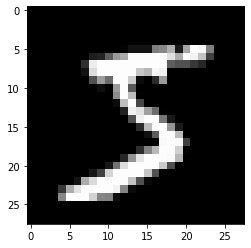

In [ ]:
import matplotlib.pyplot as plt

with tf.device("CPU:0"):
    cpu_model = build_model(allow_cudnn_kernel=True)
    cpu_model.set_weights(model.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap=plt.get_cmap("gray"))

❓❓❓

## Question 10

a) From the text above, explain the affirmation: "You simply don't have to worry about the hardware you're running on anymore." Why?

b) Is the code above needed to make the model runn in CPUs when no GPU is available?

## Answer 10

**Please enter your answer here**

❓❓❓